In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# DOWNLOAD DATASET AND BASIC REQUIREMNETS



# Importing header files and loading dataset 

In [6]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns',None)

In [7]:
# train_df = pd.read_csv("/kaggle/input/DontGetKicked/training.csv")
# test_df = pd.read_csv("/kaggle/input/DontGetKicked/test.csv")
# submissions_df = pd.read_csv("/kaggle/input/DontGetKicked/example_entry.csv")

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submissions_df = pd.read_csv("sample_submission.csv")


train_df.head(5)

,IsBadBuy,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,1,8,DODGE,1500 RAM PICKUP 2WD,ST,REG CAB 3.7L ST,GREY,AUTO,1.0,Alloy,96094.0,AMERICAN,LARGE TRUCK,3558.0,4257.0,6863.0,7580.0,3496.0,4363.0,6833.0,7779.0,6420.0,0.0,920.0
1,0,9,NISSAN,SENTRA,GXE,4D SEDAN,BLUE,AUTO,2.0,Covers,85441.0,TOP LINE ASIAN,COMPACT,2026.0,2356.0,4635.0,5071.0,2223.0,2613.0,4626.0,4975.0,3950.0,0.0,894.0
2,0,4,CHEVROLET,TRAILBLAZER EXT 2WD,LS,4D SUV 4.2L LS,GREEN,AUTO,1.0,Alloy,70679.0,AMERICAN,MEDIUM SUV,8234.0,9556.0,9393.0,10820.0,8407.0,9652.0,9580.0,10924.0,8520.0,0.0,1155.0
3,0,5,CHRYSLER,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,59140.0,AMERICAN,MEDIUM,3431.0,4332.0,6951.0,7819.0,4154.0,5268.0,7510.0,8653.0,5870.0,0.0,1086.0
4,0,5,PONTIAC,GRAND PRIX,Bas,4D SEDAN,WHITE,AUTO,1.0,Alloy,71006.0,AMERICAN,LARGE,4864.0,6099.0,8291.0,9680.0,4089.0,5451.0,7696.0,8937.0,6595.0,0.0,1974.0


In [8]:
train_df.isnull().sum()

IsBadBuy                               0
VehicleAge                             0
Make                                   0
Model                                  0
Trim                                 234
SubModel                               2
Color                                  2
Transmission                           2
WheelTypeID                          500
WheelType                            501
VehOdo                                 1
Nationality                            2
Size                                   2
MMRAcquisitionAuctionAveragePrice      2
MMRAcquisitionAuctionCleanPrice        2
MMRAcquisitionRetailAveragePrice       2
MMRAcquisitonRetailCleanPrice          2
MMRCurrentAuctionAveragePrice         29
MMRCurrentAuctionCleanPrice           29
MMRCurrentRetailAveragePrice          29
MMRCurrentRetailCleanPrice            29
VehBCost                               1
IsOnlineSale                           1
WarrantyCost                           1
dtype: int64

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           6629 non-null   int64  
 1   VehicleAge                         6629 non-null   int64  
 2   Make                               6629 non-null   object 
 3   Model                              6629 non-null   object 
 4   Trim                               6395 non-null   object 
 5   SubModel                           6627 non-null   object 
 6   Color                              6627 non-null   object 
 7   Transmission                       6627 non-null   object 
 8   WheelTypeID                        6129 non-null   float64
 9   WheelType                          6128 non-null   object 
 10  VehOdo                             6628 non-null   float64
 11  Nationality                        6627 non-null   objec

#EXPLORATORY DATA ANALYSIS

## IsBadBuy is the output of our classifer [target]

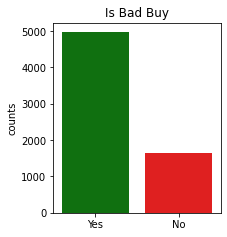

In [10]:
a=train_df.IsBadBuy.value_counts()
plt.figure(figsize=(3,3.5))
sns.barplot(x=['Yes','No'],y=a,palette=['g','r'])
plt.ylabel('counts')
plt.title("Is Bad Buy")
plt.show()

## Have a general picture of the data distribution 

### VehicleAge

#### Vehicle itself is a normal distribution


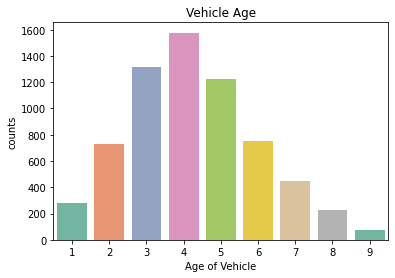

In [11]:
age=pd.DataFrame(train_df.VehicleAge.value_counts())
plt.figure(figsize=(6,4))
sns.barplot(x=age.index,y='VehicleAge',data=age,palette='Set2')
plt.ylabel('counts')
plt.xlabel('Age of Vehicle')
plt.title("Vehicle Age")
plt.show()


#### For Good Buy, the mean of distribution shift to left [younger], and vice versa.

Note: the age distribution for bad buy is so smooth, might already become "population distribution" instead of "smple distribution"

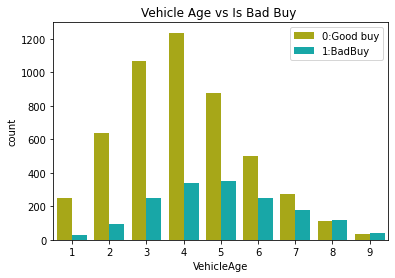

In [12]:
plt.title("Vehicle Age vs Is Bad Buy ")
sns.countplot(x = "VehicleAge", data =train_df, hue = "IsBadBuy",palette=['y','c'])
plt.legend(['0:Good buy','1:BadBuy'])
# good buy: gama distribution
# kafang distribution
plt.show()

### Make

For the brand which amount of transaction over 1000, all of them (**CHEVROLET, FORD, DODGE, CHRYSLER, PONTIAC**) have large probability to end up as a Bad Buy.

> All brands seems have large probability of leading a Bad Buy.

In [13]:
px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

In [14]:
print(train_df.Make.value_counts().keys())

Index(['CHEVROLET', 'DODGE', 'FORD', 'CHRYSLER', 'PONTIAC', 'KIA', 'NISSAN',
       'SATURN', 'HYUNDAI', 'JEEP', 'SUZUKI', 'TOYOTA', 'MERCURY',
       'MITSUBISHI', 'MAZDA', 'BUICK', 'GMC', 'HONDA', 'OLDSMOBILE', 'ISUZU',
       'SCION', 'LINCOLN', 'VOLKSWAGEN', 'INFINITI', 'LEXUS', 'CADILLAC',
       'MINI', 'VOLVO', 'SUBARU', 'TOYOTA SCION', 'ACURA'],
      dtype='object')


#### Drop some Maker that only appears on a too low frequency.

In [15]:
threshold = 200 # Anything that occurs less than this will be removed.
value_counts = train_df.Make.value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
train_df.Make.replace(to_remove, np.nan, inplace=True)

print(train_df.Make.value_counts().keys())
# px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

Index(['CHEVROLET', 'DODGE', 'FORD', 'CHRYSLER', 'PONTIAC', 'KIA'], dtype='object')


In [16]:
px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

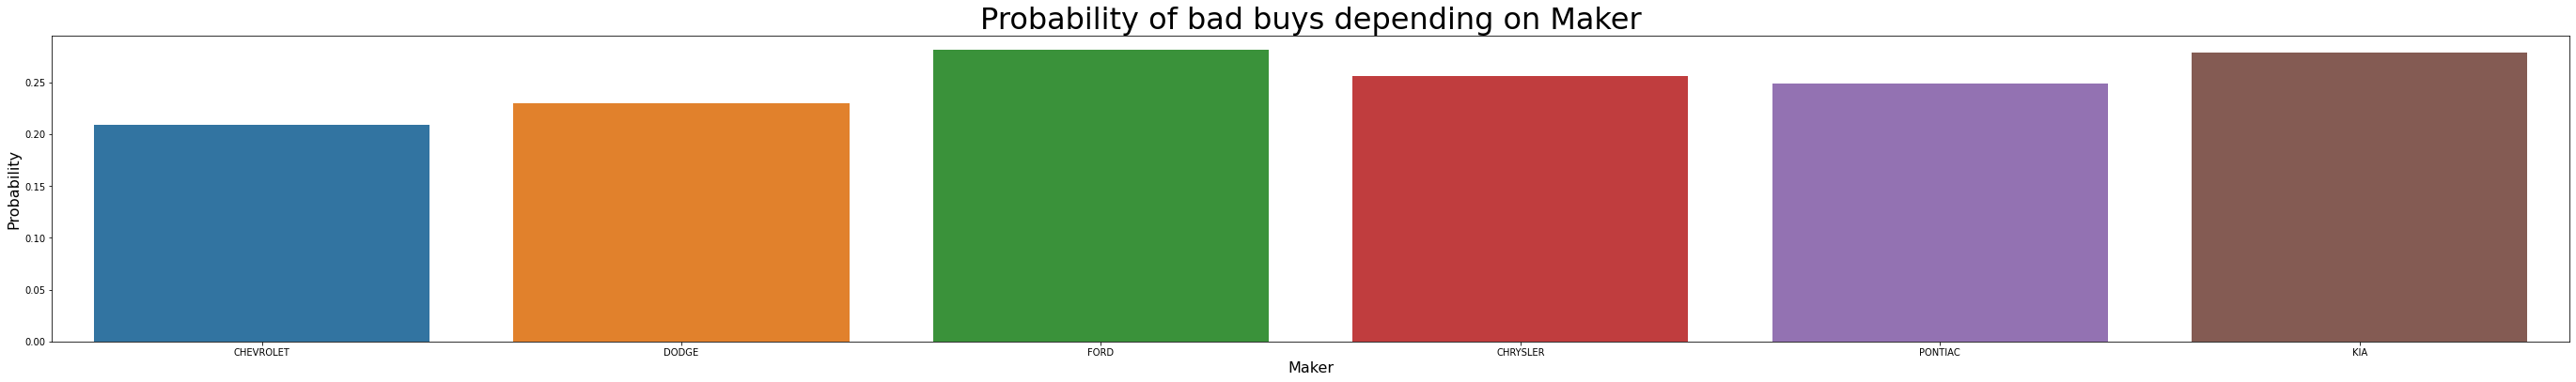

In [17]:
x_titles = train_df.Make.value_counts().keys()
y_titles = [None] * len(x_titles)
for idx in range(len(x_titles)):
  curr = train_df[(train_df.Make==x_titles[idx])].count()[1]
  curr_bad = train_df[(train_df.Make== x_titles[idx])&(train_df.IsBadBuy==1)].count()[1]
  y_titles[idx] = curr_bad/curr
  # print("{0:.0%}".format(y_titles[idx]))

plt.figure(figsize=(48,6))
plt.title("Probability of bad buys depending on Maker",fontsize=32)
plt.ylabel('Probability',fontsize=16)
plt.xlabel('Maker',fontsize=16)
sns.barplot(x=x_titles,y=y_titles)
plt.show()


### Nationality


In [18]:
px.histogram(train_df, x = "Nationality", color = "IsBadBuy",height=450,width=800)

## MMR-Acquisition and MMR-Current Price

### MMRAcquisitionAuctionAveragePrice & MMRAcquisitionRetailAveragePrice

It's obvious that we need to drop the data beyound 18K for MMRAcquisitionAuctionAveragePrice
> [Idea #1] always drop the data that fall ourside of 2.5%-97.2%  
> **[Idea #2] USE PCA TO NORMALIZE DATA!!!!!!!!!!!**


In [19]:
px.scatter(train_df, x = 'MMRAcquisitionAuctionAveragePrice', y = 'MMRAcquisitionRetailAveragePrice', color = 'IsBadBuy',height=500,width=1000)

### MMRAcquisitionAuctionAveragePrice & MMRCurrentAverageAveragePrice

It's obvious that we need to drop the data beyound 18K for MMRAcquisitionAuctionAveragePrice; as well as 0k.


In [20]:
px.scatter(train_df, x = 'MMRAcquisitionAuctionAveragePrice', y = 'MMRCurrentAuctionAveragePrice' ,color = 'IsBadBuy',height=500,width=1000)

### Correlation? 

Note: there are many missing data and some off data which will be definitely droped  


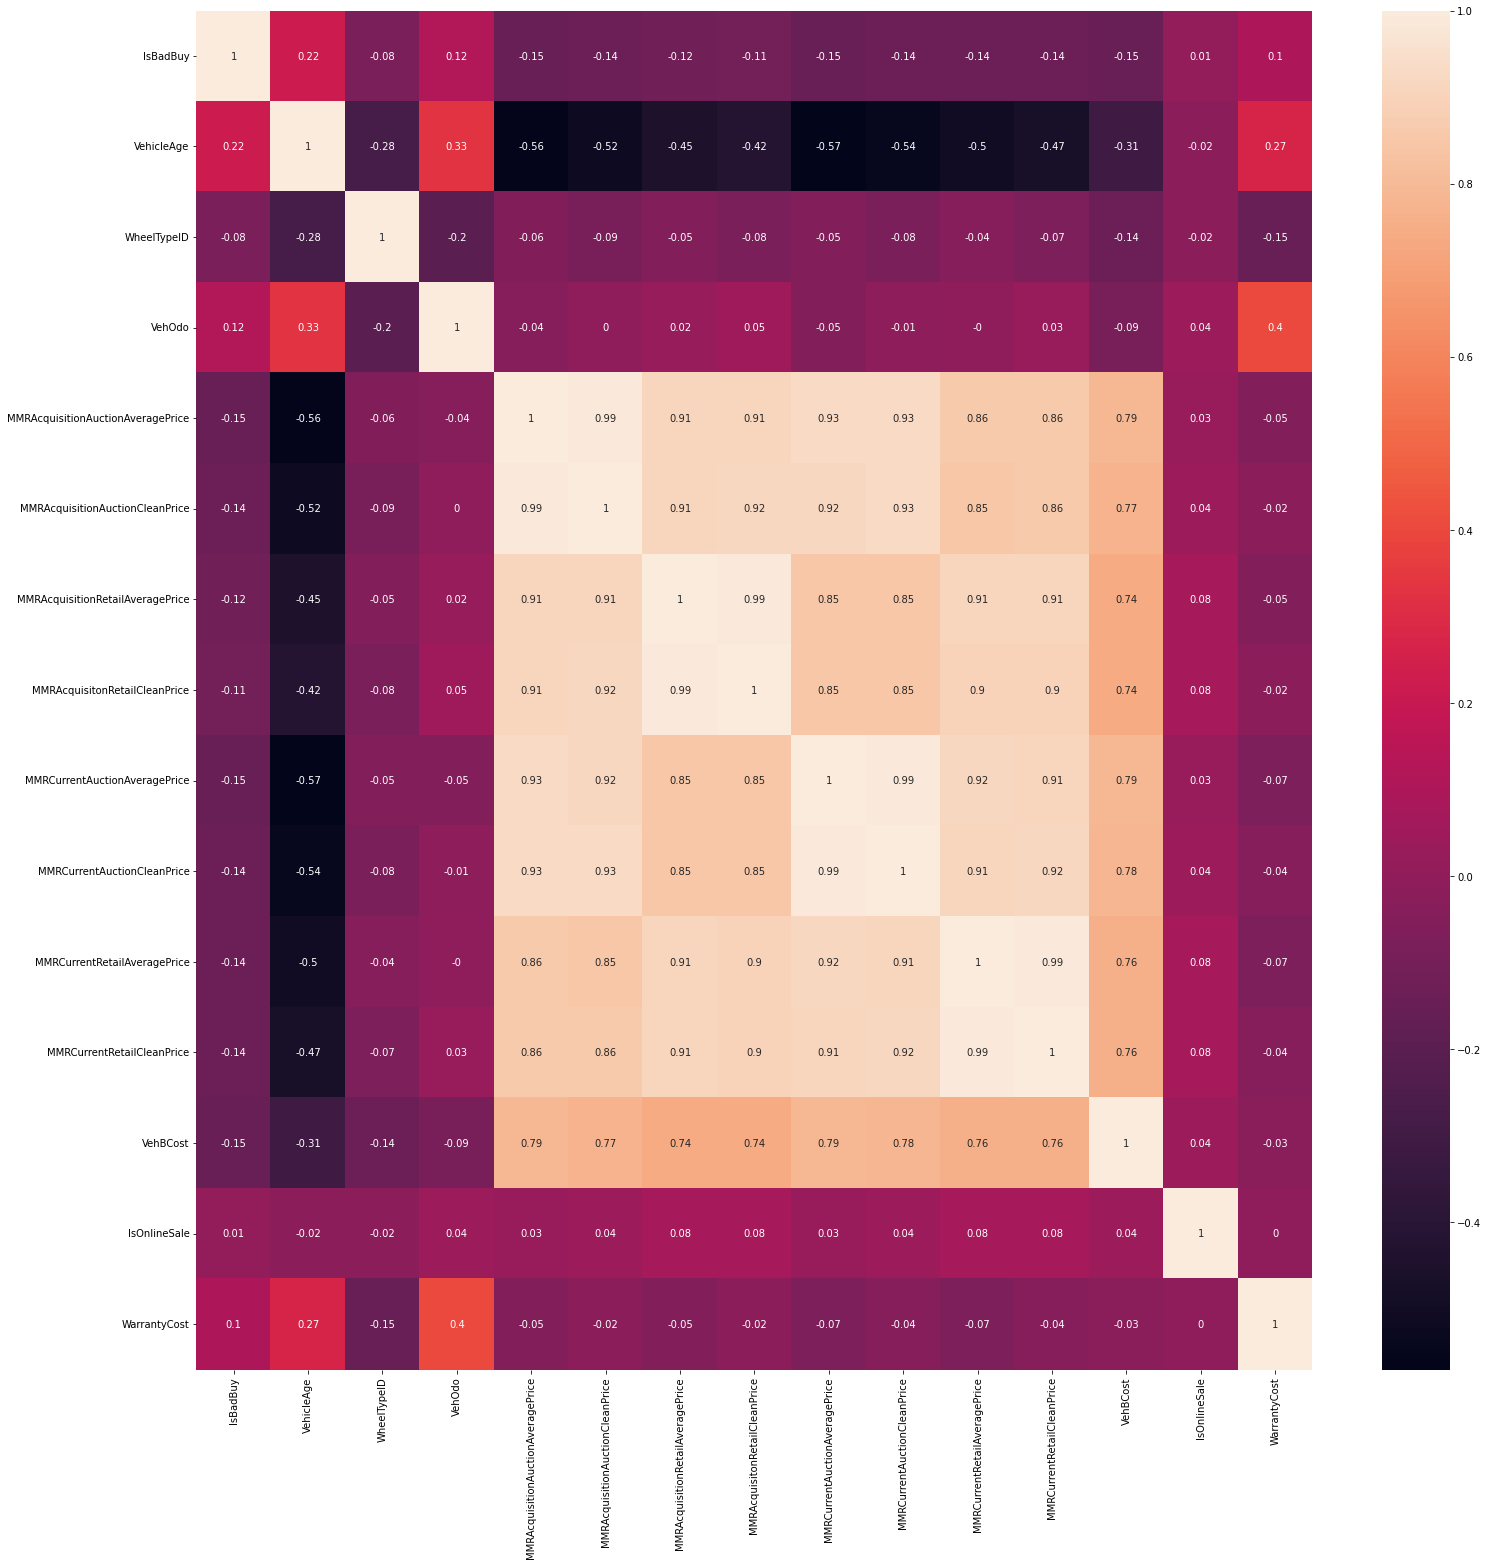

In [21]:
## remember "IsBadBuy" is our target.

plt.figure(figsize=(25,25))
correlation_matrix = train_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

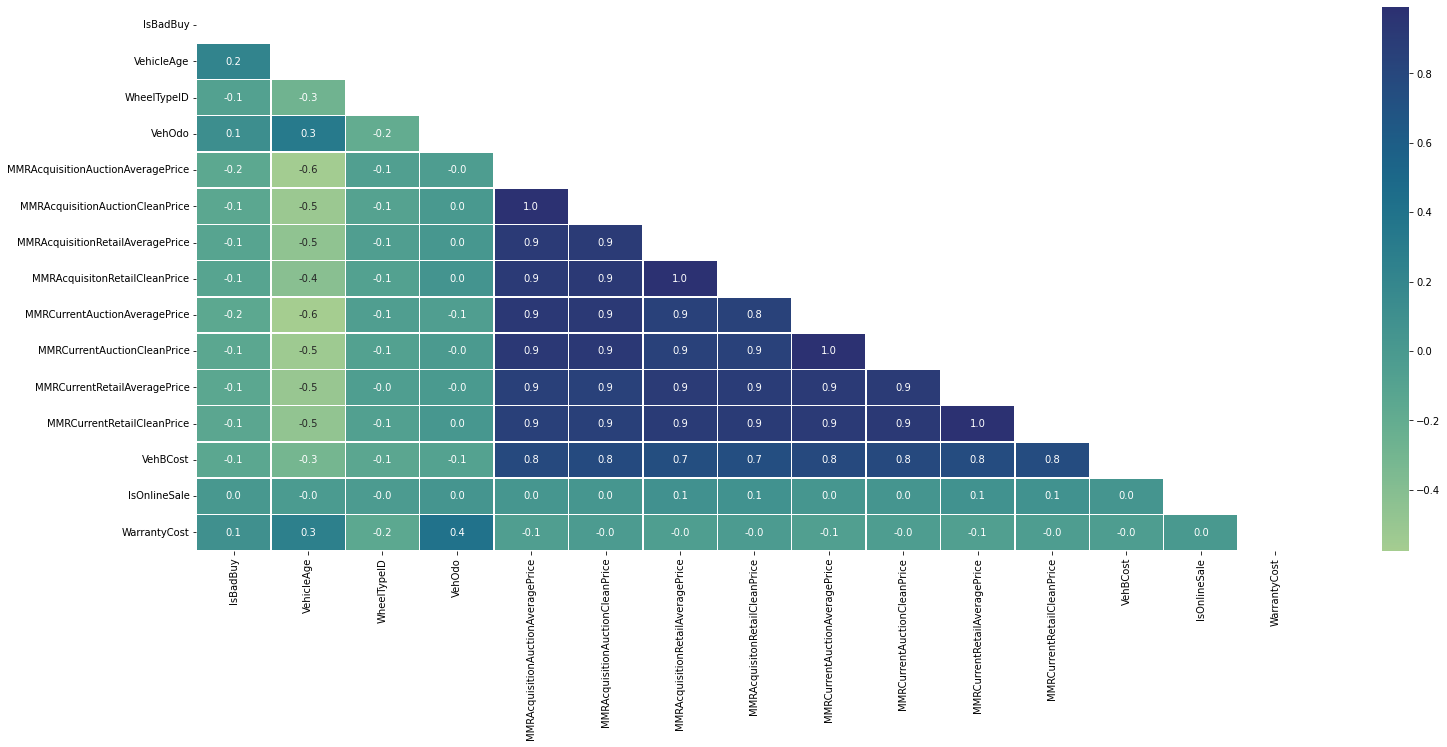

In [22]:
plt.figure(figsize=(25,10))
mask_matrix=np.triu(train_df.corr())
sns.heatmap(train_df.corr(),cmap='crest',annot=True, linewidths=.5, fmt= '.1f',mask=mask_matrix);
plt.show();

Probability of bad buys depending on country :- 
----------------------------------------------

AMERICAN	:  0.2469672279558211 
OTHER ASIAN	:  0.261968085106383 
Top LINE ASIAN	:  0.24705882352941178 
OTHERS		:  0.3333333333333333


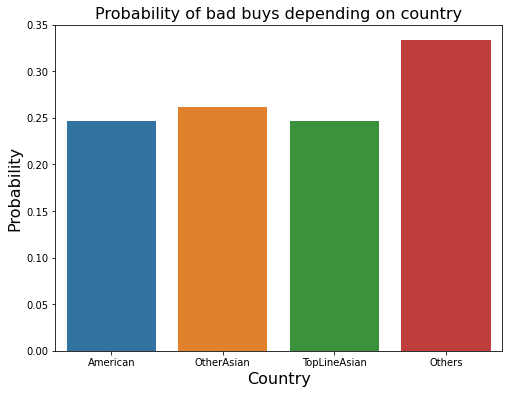

In [23]:
total=train_df.Nationality.value_counts()
american=train_df[(train_df.Nationality=='AMERICAN')&(train_df.IsBadBuy==1)].count()[1]
otherasian=train_df[(train_df.Nationality=='OTHER ASIAN')&(train_df.IsBadBuy==1)].count()[1]
topasian=train_df[(train_df.Nationality=='TOP LINE ASIAN')&(train_df.IsBadBuy==1)].count()[1]
other=train_df[(train_df.Nationality=='OTHER')&(train_df.IsBadBuy==1)].count()[1]
print("Probability of bad buys depending on country :- \n----------------------------------------------\n")
print("AMERICAN\t: ",american/total[0],
        "\nOTHER ASIAN\t: ",otherasian/total[1], 
        "\nTop LINE ASIAN\t: " ,topasian/total[2],
        "\nOTHERS\t\t: ",other/total[3])
x_titles=['American','OtherAsian','TopLineAsian','Others'];
y_titles=[american/total[0],otherasian/total[1],topasian/total[2],other/total[3]]
plt.figure(figsize=(8,6))
plt.title("Probability of bad buys depending on country",fontsize=16)
plt.ylabel('Probability',fontsize=16)
plt.xlabel('Country',fontsize=16)
sns.barplot(x=x_titles,y=y_titles);
plt.show()

### Analysis made:

* The given Dataset has Dataset alot of Yes for **`IsBadBuy`** column (alot of zeros denoting good buy)
* Maximum cars comming for resale is **3-4 yrs** old and is mostly considered a good buy compared to the ones which are **4-5 years** old
* **OTHER ASIAN** countries seem to dominate the probability of bad buys when segregated according to nationality (**OTHERS** only have few records -- hence, the propbability data is no representative.)
* Resale Cars from **America** can be bought as it has less chances of beeing a bad buy as compared to the other nationalities 
* **Ford** and **Chevrolet** cars have a high chance of being a bad buy

#Feature Engineering

In [24]:
print("Description about the columns of Dataset:-\n")
text_file = open('metaData.txt')
file_content = text_file.read()
print(file_content)
text_file.close()

Description about the columns of Dataset:-

IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
MMRAcquisitionAuctionAveragePrice	Acquisition price for this vehicle in average condition at time of purchase	
MMRAcquisitionAuctionCleanPrice	Acquisition price for this vehicle in the above Average condition at time of purchase
MMRAcquisitionRetailAveragePrice	Acquisition price for this vehicle in the retail market in average condition at time of purchase
MMRAcq

1. **WheelTypeID and WheelType** seems weird... but still should keep.
2. Back to previous data ploting, we can drop one of the colinearity columns. -- we choose to drop all of XXX_AveragePrice as they have higher correlation toward VehicleAge (which is definitaly be selected for classifer model.)



In [25]:
train_df.drop(['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionRetailAveragePrice','MMRCurrentAuctionAveragePrice','MMRCurrentRetailAveragePrice'],axis=1,inplace=True)
test_df.drop(['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionRetailAveragePrice','MMRCurrentAuctionAveragePrice','MMRCurrentRetailAveragePrice'],axis=1,inplace=True)

3. We should handle the WheelType and WheelTypeID as they are representing same thing with string and numerical value, respectively.

In [26]:
train_df.WheelType.value_counts(dropna=False)

Alloy      3215
Covers     2840
NaN         501
Special      73
Name: WheelType, dtype: int64

In [27]:
# [Idea #3] I should not give it numerical value as it implies a numerical rank.
# Hence, I want to use n colomns (instead) to denotes the WhellType information in a binary way.... 
train_df.WheelTypeID.value_counts(dropna=False)

1.0    3215
2.0    2840
NaN     500
3.0      73
0.0       1
Name: WheelTypeID, dtype: int64

In [28]:
print("For Training Dataset:")
df=pd.DataFrame(train_df.isna().sum())
df.rename({0:'counts'},axis=1,inplace=True)
df[(df.counts>0)]

For Training Dataset:


,counts
Make,1480
Trim,234
SubModel,2
Color,2
Transmission,2
WheelTypeID,500
WheelType,501
VehOdo,1
Nationality,2
Size,2


In [29]:
print("For Test Dataset:")
df=pd.DataFrame(test_df.isna().sum())
df.rename({0:'counts'},axis=1,inplace=True)
df[(df.counts>0)]

For Test Dataset:


,counts
Trim,401
SubModel,2
Color,2
Transmission,2
WheelTypeID,798
WheelType,798
MMRAcquisitionAuctionCleanPrice,2
MMRAcquisitonRetailCleanPrice,2
MMRCurrentAuctionCleanPrice,49
MMRCurrentRetailCleanPrice,49


In [30]:
for col in train_df:
   print(col," \t\t\t value_counts: \t",len(train_df[f'{col}'].value_counts()))

IsBadBuy  			 value_counts: 	 2
VehicleAge  			 value_counts: 	 9
Make  			 value_counts: 	 6
Model  			 value_counts: 	 623
Trim  			 value_counts: 	 102
SubModel  			 value_counts: 	 475
Color  			 value_counts: 	 16
Transmission  			 value_counts: 	 2
WheelTypeID  			 value_counts: 	 4
WheelType  			 value_counts: 	 3
VehOdo  			 value_counts: 	 6214
Nationality  			 value_counts: 	 4
Size  			 value_counts: 	 12
MMRAcquisitionAuctionCleanPrice  			 value_counts: 	 4282
MMRAcquisitonRetailCleanPrice  			 value_counts: 	 4537
MMRCurrentAuctionCleanPrice  			 value_counts: 	 4276
MMRCurrentRetailCleanPrice  			 value_counts: 	 4522
VehBCost  			 value_counts: 	 1435
IsOnlineSale  			 value_counts: 	 2
WarrantyCost  			 value_counts: 	 224


In [31]:
print("Model.value_counts:",len(train_df.Model.value_counts(dropna=False)))
print("Make.value_counts:",len(train_df.Make.value_counts(dropna=False)))
print("SubModel.value_counts:",len(train_df.SubModel.value_counts(dropna=False)))
print("Color.value_counts:",len(train_df.Color.value_counts(dropna=False)))
print("WheelType.value_counts:",len(train_df.WheelType.value_counts(dropna=False)))
print("WheelTypeID.value_counts:",len(train_df.WheelTypeID.value_counts(dropna=False)))
print("Trim.value_counts:",len(train_df.Trim.value_counts(dropna=False)))
print("Nationality.value_counts:",len(train_df.Nationality.value_counts(dropna=False)))
print("Transmission.value_counts:",len(train_df.Transmission.value_counts(dropna=False)))
print("Size.value_counts:",len(train_df.Size.value_counts(dropna=False)))
print("IsOnlineSale.value_counts:",len(train_df.IsOnlineSale.value_counts(dropna=False)))

Model.value_counts: 623
Make.value_counts: 7
SubModel.value_counts: 476
Color.value_counts: 17
WheelType.value_counts: 4
WheelTypeID.value_counts: 5
Trim.value_counts: 103
Nationality.value_counts: 5
Transmission.value_counts: 3
Size.value_counts: 13
IsOnlineSale.value_counts: 3


In [32]:
train_df.Transmission.value_counts(dropna=False)
train_df["Transmission"].replace("Manual","MANUAL",inplace=True)
train_df.Transmission.value_counts(dropna=False)

AUTO      6386
MANUAL     241
NaN          2
Name: Transmission, dtype: int64

In [33]:
train_df.Nationality.value_counts(dropna=False)

AMERICAN          5523
OTHER ASIAN        752
TOP LINE ASIAN     340
OTHER               12
NaN                  2
Name: Nationality, dtype: int64

In [34]:
train_df.Size.value_counts(dropna=False)

MEDIUM         2803
LARGE           784
MEDIUM SUV      764
COMPACT         674
VAN             523
LARGE TRUCK     262
SMALL SUV       223
CROSSOVER       173
SPECIALTY       158
LARGE SUV       125
SMALL TRUCK      71
SPORTS           67
NaN               2
Name: Size, dtype: int64

In [35]:
px.histogram(train_df, x = "Size", color = "IsBadBuy",height=500,width=800)

In [36]:
print(train_df.Model.value_counts().keys())

Index(['PT CRUISER', 'IMPALA', 'TAURUS', 'CALIBER', 'PT CRUISER 2.4L I4 S',
       'TAURUS 3.0L V6 EFI', 'MALIBU 4C', 'SEBRING 4C', 'COBALT', 'IMPALA V6',
       ...
       'ACCENT 1.6L I-4 MPI', 'CAMRY SOLARA V6', 'RAIDER 2WD V6 3.7L V',
       'NITRO 2WD V6 3.7L V6', 'TRAILBLAZER 2WD V8', 'GRAND VITARA 4WD',
       'TORRENT AWD V6', 'PARK AVENUE', 'RX300 2WD 3.0L V6 EF', 'AURA 4C'],
      dtype='object', length=623)


In [37]:
threshold = 200 # Anything that occurs less than this will be removed.
value_counts = train_df.Model.value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
train_df.Model.replace(to_remove, np.nan, inplace=True)

print(train_df.Model.value_counts().keys())

Index(['PT CRUISER'], dtype='object')


In [38]:
train_df.Model.value_counts(dropna=False)

NaN           6402
PT CRUISER     227
Name: Model, dtype: int64

### Conclusions ------- Will change!!!!


1. We can drop **`Model`**, **`Trim`** and **`SubModel`** as they have alot of categories **and model wont be able to learn all of them**.


2. Note: **`WheelType`** and **`WheelTypeID`** are one and the same. One of them is containing numeric categories and other as string. Its better we drop **`WheelTypeID`** as the other column has type of metal used for making the wheel which might help us understand the importance of a particular metal used in making the wheel

3.  **`VehYear`** might not play a crucial role as we have  **`VehicleAge`** as a column. The  **`PurchDate`** varies and similarly  **`VehYear`** varies.The only thing that matters is how much old the vehicle is at the time of resale. Thus `drop` **`VehYear`**

4. State from which car is bought should nit be a factor for judging bad buy . Thus we can drop **`VNST`** .


In [39]:
train_df.drop(['Model','Trim','SubModel','WheelTypeID'],axis=1,inplace=True)
test_df.drop(['Model','Trim','SubModel','WheelTypeID'],axis=1,inplace=True)

In [40]:
train_df.sample(5)

,IsBadBuy,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,MMRAcquisitionAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
247,0,7,NaN,SILVER,AUTO,Covers,29632.0,AMERICAN,MEDIUM,2730.0,3448.0,2730.0,3448.0,4235.0,0.0,942.0
4481,0,6,CHRYSLER,BLACK,MANUAL,Special,78868.0,AMERICAN,MEDIUM,3728.0,4526.0,3728.0,4526.0,3685.0,0.0,1689.0
1516,1,4,NaN,SILVER,AUTO,Alloy,78156.0,AMERICAN,MEDIUM SUV,14324.0,18498.0,14555.0,18774.0,9370.0,0.0,1974.0
164,0,6,NaN,GOLD,AUTO,Alloy,71053.0,AMERICAN,MEDIUM,6251.0,10239.0,5980.0,9296.0,5435.0,0.0,920.0
3271,0,3,KIA,BLUE,AUTO,Covers,47820.0,OTHER ASIAN,COMPACT,4793.0,5676.0,5659.0,6612.0,5555.0,0.0,482.0


In [41]:
df=pd.DataFrame(train_df.isna().sum())
df.rename({0:'counts'},axis=1,inplace=True)
df[(df.counts>0)]

,counts
Make,1480
Color,2
Transmission,2
WheelType,501
VehOdo,1
Nationality,2
Size,2
MMRAcquisitionAuctionCleanPrice,2
MMRAcquisitonRetailCleanPrice,2
MMRCurrentAuctionCleanPrice,29


In [42]:
# Define in which columns to look for missing values.
train_df = train_df.dropna(subset=[ 'Color', 'Transmission', 'Nationality', 'Size']);
# train_df = train_df.dropna(thresh=2)
test_df = test_df.dropna(subset=['Color', 'Transmission', 'Nationality', 'Size']);
# test_df = test_df.dropna(thresh=2)

In [43]:
df=pd.DataFrame(train_df.isna().sum())
df.rename({0:'counts'},axis=1,inplace=True)
df[(df.counts>0)]

,counts
Make,1479
WheelType,499
MMRAcquisitionAuctionCleanPrice,1
MMRAcquisitonRetailCleanPrice,1
MMRCurrentAuctionCleanPrice,28
MMRCurrentRetailCleanPrice,28


# Data Cleaning


In [44]:
targets=train_df['IsBadBuy']
train_df.drop('IsBadBuy',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# test_df = test_df.dropna(thresh=2)
# train_df = train_df.dropna(thresh=2)

In [46]:
train_df.sample(5)

,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,MMRAcquisitionAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
2671,7,DODGE,GOLD,MANUAL,Covers,92370.0,AMERICAN,COMPACT,2558.0,5905.0,2922.0,5627.0,3100.0,0.0,1065.0
4237,1,DODGE,BLUE,AUTO,NaN,41475.0,AMERICAN,MEDIUM,8187.0,9342.0,7765.0,8886.0,7400.0,0.0,693.0
6443,4,NaN,GOLD,AUTO,NaN,86434.0,AMERICAN,SMALL SUV,9679.0,10953.0,9655.0,10927.0,6135.0,0.0,983.0
4040,3,CHRYSLER,BLUE,AUTO,Covers,42918.0,AMERICAN,MEDIUM,6097.0,7085.0,7052.0,8116.0,5800.0,0.0,975.0
6535,5,NaN,SILVER,AUTO,NaN,82739.0,AMERICAN,MEDIUM,3900.0,4712.0,3900.0,4712.0,5130.0,0.0,2152.0


In [47]:
categorical_cols = train_df.select_dtypes(include = 'object').columns.tolist()
numeric_cols = train_df.select_dtypes(exclude='object').columns.tolist()

In [48]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean');
imputer.fit(train_df[numeric_cols]);
train_df[numeric_cols]=imputer.transform(train_df[numeric_cols]);
test_df[numeric_cols]=imputer.transform(test_df[numeric_cols]);

In [49]:
# threshold = 200 # Anything that occurs less than this will be removed.
# value_counts = train_df.Make.value_counts() # Specific column 
# to_remove = value_counts[value_counts <= threshold].index
# train_df.Make.replace(to_remove, np.nan, inplace=True)

# print(train_df.Make.value_counts().keys())
# # px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

In [50]:
# px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

In [51]:
# train_df.Trim.value_counts()

In [52]:
train_df.sample(5)

,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,MMRAcquisitionAuctionCleanPrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
5460,4.0,DODGE,WHITE,AUTO,Alloy,84535.0,AMERICAN,VAN,8190.0,9345.0,7250.0,8330.0,6380.0,0.0,1763.0
1277,7.0,NaN,YELLOW,AUTO,Alloy,64122.0,AMERICAN,SMALL SUV,10309.0,11634.0,10309.0,11634.0,9125.0,0.0,1808.0
2976,4.0,CHEVROLET,SILVER,AUTO,Covers,74003.0,AMERICAN,COMPACT,6808.0,10303.0,6890.0,10151.0,5100.0,0.0,803.0
1387,2.0,CHEVROLET,BLACK,AUTO,Covers,75239.0,AMERICAN,LARGE,8706.0,12903.0,8595.0,12029.0,7230.0,0.0,1974.0
1124,4.0,NaN,RED,AUTO,Alloy,87279.0,TOP LINE ASIAN,LARGE,13530.0,17121.0,13046.0,17493.0,10235.0,0.0,1243.0


In [53]:
# Due to different versions of libraries OneHotEncoder is not working efficiently (i.e not able to deal with NaN values)
train_df.Make.fillna('Make_unk',inplace=True)
test_df.Make.fillna('Make_unk',inplace=True)

train_df.Transmission.fillna('Trans_unk',inplace=True)
train_df.WheelType.fillna('WheelType_unk',inplace=True)
train_df.Nationality.fillna('Nationality_unk',inplace=True)
train_df.Size.fillna('Trans_unk',inplace=True)
train_df.Color.fillna('Color_unk',inplace=True)

test_df.Size.fillna('Trans_unk',inplace=True)
test_df.WheelType.fillna('Trans_unk',inplace=True)
test_df.Nationality.fillna('Trans_unk',inplace=True)
test_df.Transmission.fillna('Trans_unk',inplace=True)
test_df.Color.fillna('Color_unk',inplace=True)

In [54]:
# train_df.drop('IsBadBuy',axis=1,inplace=True)

In [55]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
train_df[encoded_cols]=encoder.transform(train_df[categorical_cols]);
test_df[encoded_cols]=encoder.transform(test_df[categorical_cols]);
# get_feature_names_out

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_df[numeric_cols]);
train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
test_df[numeric_cols]=scaler.transform(test_df[numeric_cols])

In [57]:
train_df=train_df[numeric_cols+encoded_cols]
test_df=test_df[numeric_cols+encoded_cols]

In [58]:
from sklearn.model_selection import train_test_split
inputs,val_inputs,targets,val_targets = train_test_split(train_df,targets,test_size=0.25, random_state=42)

# DUMB MODEL

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix
# A Dum model saying "NO" always has a accuracy of 87% . So we need to have a percentage above it !!!!!!!!
dum_model_outs=np.zeros(len(inputs))
accuracy_score(dum_model_outs,targets)

0.7504528074059167

In [60]:
train_df.isnull().sum()

VehicleAge                         0
VehOdo                             0
MMRAcquisitionAuctionCleanPrice    0
MMRAcquisitonRetailCleanPrice      0
MMRCurrentAuctionCleanPrice        0
MMRCurrentRetailCleanPrice         0
VehBCost                           0
IsOnlineSale                       0
WarrantyCost                       0
Make_CHEVROLET                     0
Make_CHRYSLER                      0
Make_DODGE                         0
Make_FORD                          0
Make_KIA                           0
Make_Make_unk                      0
Make_PONTIAC                       0
Color_BEIGE                        0
Color_BLACK                        0
Color_BLUE                         0
Color_BROWN                        0
Color_GOLD                         0
Color_GREEN                        0
Color_GREY                         0
Color_MAROON                       0
Color_NOT AVAIL                    0
Color_ORANGE                       0
Color_OTHER                        0
C

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626 entries, 0 to 6627
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   VehicleAge                       6626 non-null   float64
 1   VehOdo                           6626 non-null   float64
 2   MMRAcquisitionAuctionCleanPrice  6626 non-null   float64
 3   MMRAcquisitonRetailCleanPrice    6626 non-null   float64
 4   MMRCurrentAuctionCleanPrice      6626 non-null   float64
 5   MMRCurrentRetailCleanPrice       6626 non-null   float64
 6   VehBCost                         6626 non-null   float64
 7   IsOnlineSale                     6626 non-null   float64
 8   WarrantyCost                     6626 non-null   float64
 9   Make_CHEVROLET                   6626 non-null   float64
 10  Make_CHRYSLER                    6626 non-null   float64
 11  Make_DODGE                       6626 non-null   float64
 12  Make_FORD           

In [62]:
# ## remember "IsBadBuy" is our target.

# plt.figure(figsize=(250,250))
# correlation_matrix = train_df.corr().round(2)
# # annot = True to print the values inside the square
# sns.heatmap(data=correlation_matrix, annot=True)

# Model-1 : DecisionTreeClassifier [Never use it!!!!!]

It merely used by doctors for illustration

In [63]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model=DecisionTreeClassifier(max_depth=12,random_state=42)
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

Train_acc: 0.8927349567317368  | Val_acc: 0.756185878092939
CPU times: user 74.6 ms, sys: 4.22 ms, total: 78.9 ms
Wall time: 131 ms


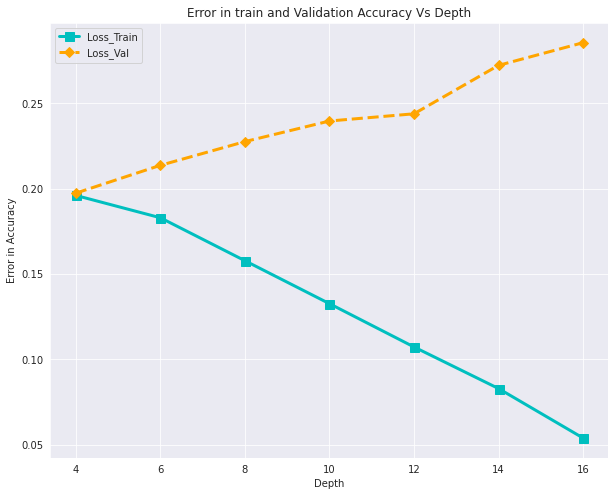

In [64]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max,2):
        model =DecisionTreeClassifier(max_depth=i, random_state=42)
        model.fit(inputs,targets)
        depth.append(i)
        tr_ac.append(model.score(inputs,targets))
        va_ac.append(model.score(val_inputs,val_targets))
        
    tr_ac=1-np.array(tr_ac);
    va_ac=1-np.array(va_ac);
    
    plt.figure(figsize=(10,8))
    sns.set_style('darkgrid')
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cs-',linewidth=3,markersize=9)
    plt.plot(depth,va_ac,'D--',color='orange',linewidth=3, markersize=7)
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
max_depth(4,18)

In [65]:
model=DecisionTreeClassifier(max_depth=6,random_state=42,max_features=0.9,class_weight={0:1,1:2})
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

Train_acc: 0.8134433487623264  | Val_acc: 0.7688593844296923


In [66]:
# preds=model.predict(test_df)
# submissions_df['IsBadBuy']=preds
# submissions_df.to_csv('Submissions.csv',index=False)

#Model-2 :- Random Forest Classifier



In [67]:
from sklearn.ensemble import RandomForestClassifier    

In [68]:
%%time
model=RandomForestClassifier(n_jobs=-1,n_estimators=2200,random_state=42)
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

Train_acc: 1.0  | Val_acc: 0.79963789981895
CPU times: user 29 s, sys: 1.2 s, total: 30.2 s
Wall time: 12.7 s


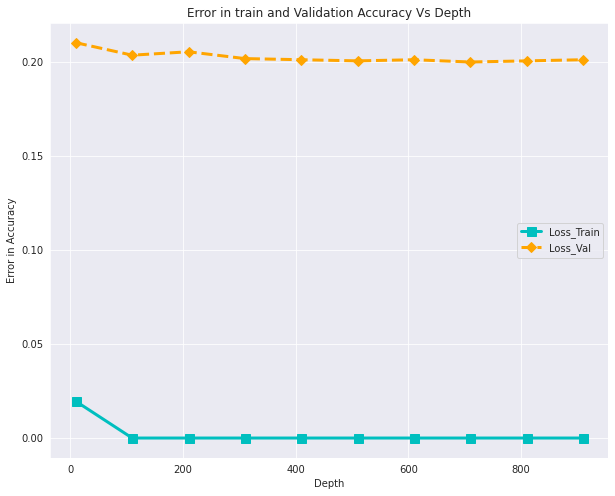

In [69]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max,100):
        model =RandomForestClassifier(n_estimators=i, random_state=42)
        model.fit(inputs,targets)
        depth.append(i)
        tr_ac.append(model.score(inputs,targets))
        va_ac.append(model.score(val_inputs,val_targets))
        
    tr_ac=1-np.array(tr_ac);
    va_ac=1-np.array(va_ac);
    
    plt.figure(figsize=(10,8))
    sns.set_style('darkgrid')
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cs-',linewidth=3,markersize=9)
    plt.plot(depth,va_ac,'D--',color='orange',linewidth=3, markersize=7)
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
max_depth(10,1000)

In [70]:
def test_model(**params):
        model=RandomForestClassifier(n_jobs=-1,random_state=42,**params)
        model.fit(inputs,targets)
        print(" | Train_acc: ",model.score(inputs,targets)," | Val_acc: ",model.score(val_inputs,val_targets) ) 
        return model.score(inputs,targets),model.score(val_inputs,val_targets)

In [71]:
test_model(n_estimators=12)
test_model(n_estimators=100)

 | Train_acc:  0.9845039243308513  | Val_acc:  0.791792395896198
 | Train_acc:  1.0  | Val_acc:  0.7966203983101992


(1.0, 0.7966203983101992)

In [72]:
%%time
model=RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=16,random_state=42)
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

Train_acc: 0.9347957335479976  | Val_acc: 0.8026554013277006
CPU times: user 1.22 s, sys: 114 ms, total: 1.34 s
Wall time: 757 ms


In [73]:
importance_df = pd.DataFrame({
    'feature': inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
37,WheelType_WheelType_unk,0.131555
6,VehBCost,0.087799
2,MMRAcquisitionAuctionCleanPrice,0.085439
1,VehOdo,0.084065
4,MMRCurrentAuctionCleanPrice,0.082661
5,MMRCurrentRetailCleanPrice,0.078917
3,MMRAcquisitonRetailCleanPrice,0.074677
8,WarrantyCost,0.065544
0,VehicleAge,0.050907
34,WheelType_Alloy,0.031769


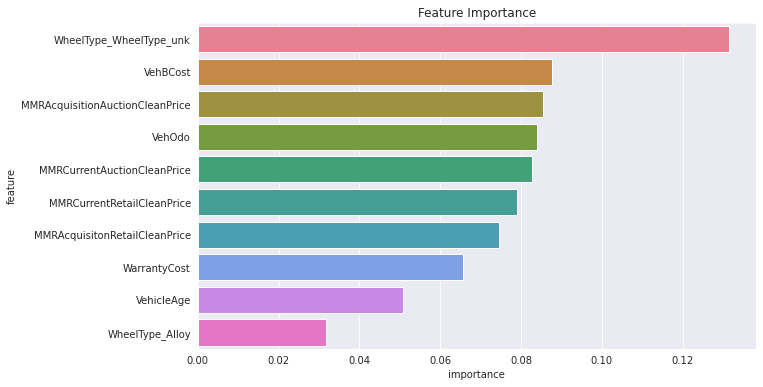

In [74]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),palette='husl',x='importance', y='feature');
plt.show()

In [75]:
# preds=model.predict_proba(test_df)
# submissions_df['IsBadBuy']=preds[:,1]
# submissions_df.to_csv('Submissions.csv',index=False)

## Summary

> **[Idea #4] I should separate "WheelType unk" into WheelType_Alloy and .. other matrial based on the ratio!!!!!!!**

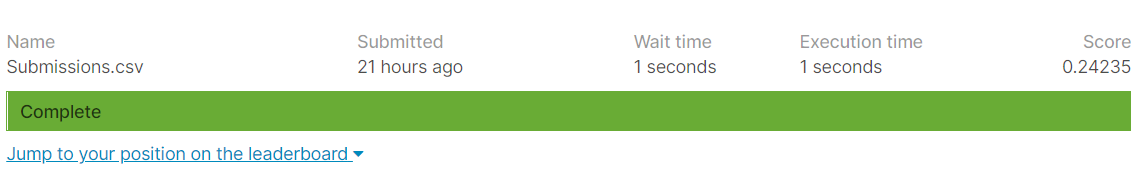

# Conclusion
I took my inspriation from the following notebooks:-

* https://www.kaggle.com/mikhailtokar/ml-rgr-dgk
* https://www.kaggle.com/yogesh893/dont-get-kicked
* https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/random-forests-and-regularization
* https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost